<a href="https://colab.research.google.com/github/rohampour/github-slideshow/blob/master/My_ECoG_faceshouses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading of Miller ECoG data of faces/houses (+ noise)

includes some visualizations

In [ ]:
#@title Data retrieval
import os, requests

fname = 'faceshouses.npz'
url = "https://osf.io/argh7/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)


In [ ]:
#@title Import matplotlib and set defaults
from matplotlib import rcParams 
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [ ]:
#@title Data loading
import numpy as np

alldat = np.load(fname, allow_pickle=True)['dat']#loads in all data

subject = 2   #Choose subject number

# select just one of the recordings here. 
dat1 = alldat[subject][0]#Part 1 - passive viewing
dat2 = alldat[subject][1]#Part 2 - viewing with noise and keypresses

print(dat1.keys())
print(dat2.keys())

#print(dat2['stim_noise'])

dict_keys(['t_off', 'stim_id', 't_on', 'srate', 'V', 'scale_uv', 'locs'])
dict_keys(['stim_id', 'stim_cat', 'stim_noise', 't_on', 't_off', 'key_press', 'V', 'categories', 'scale_uv', 'locs'])


58


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the futur

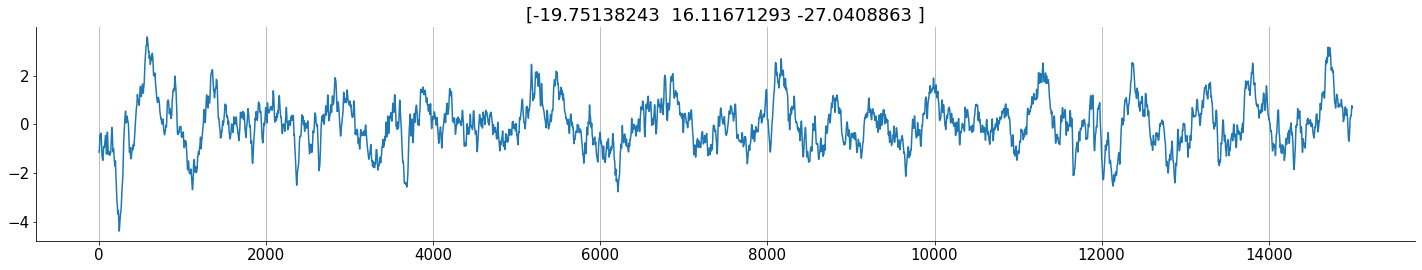

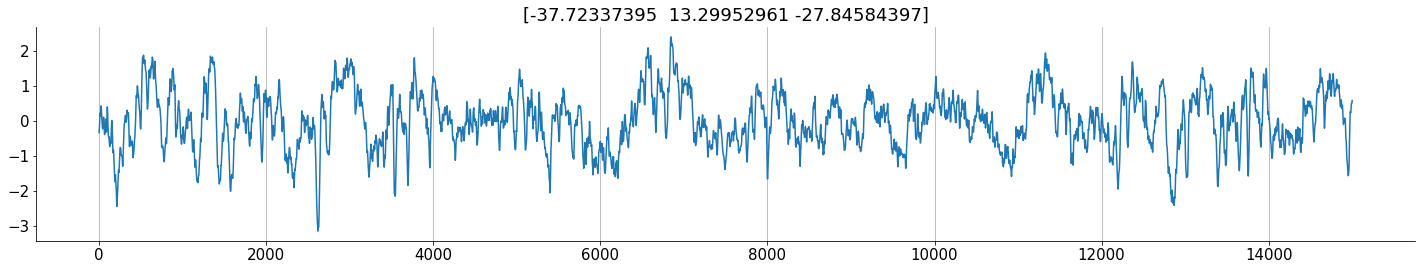

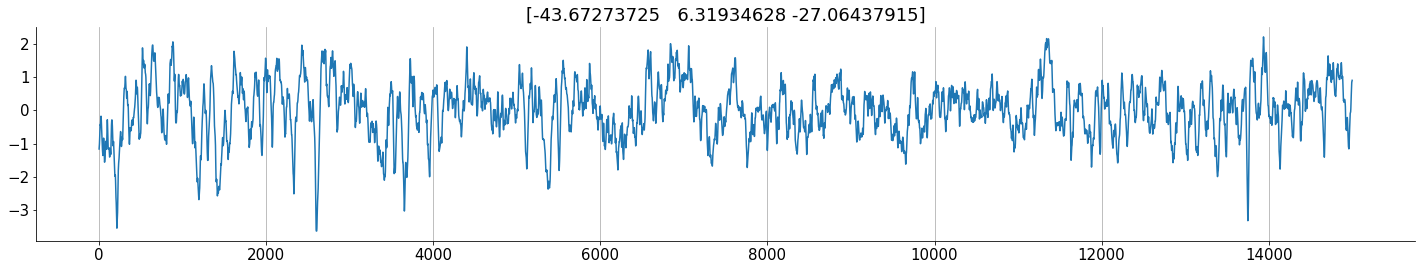

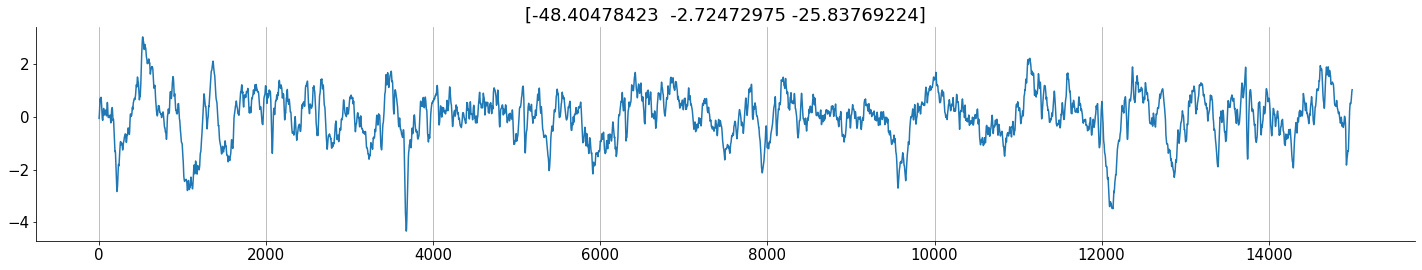

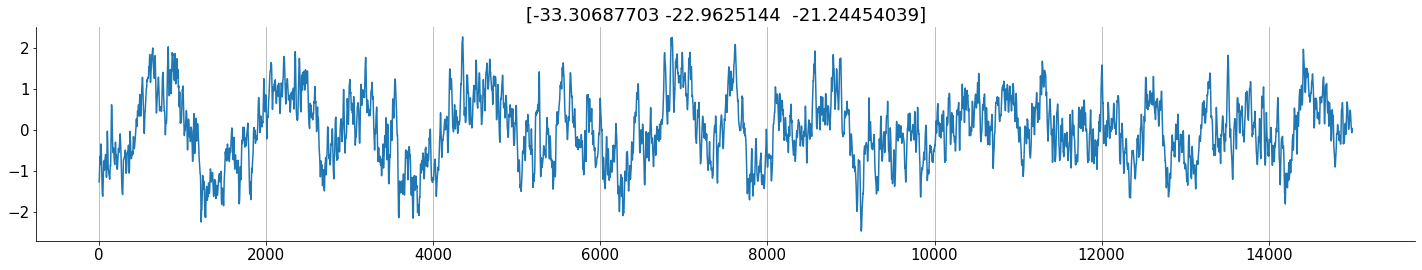

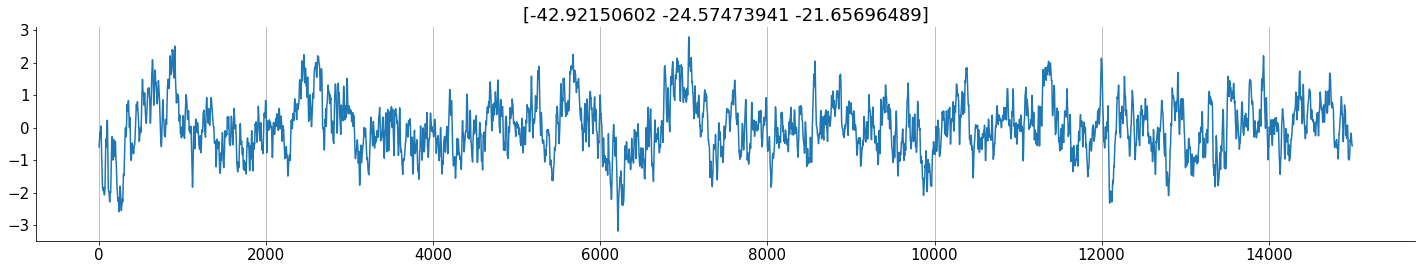

In [ ]:
import pandas as pd
import numpy as np
from scipy import signal

voltage = dat1['V']
elec_num = len(voltage.T)#Number of electrodes for individual participant
V = np.reshape(voltage,( -1,elec_num))

names = dat1['locs'] #coordinates of channels for plot titles
print(elec_num) #number of electrodes for subject
elecs = list(range(0,6,1)) #channels to plot
b, a = signal.butter(2, [.2,120],btype = 'bandpass', fs=1000) #filtering parameters


time_start = 10000 #time point at which to start plots, ms
seconds = 15 #seconds to plot

for elec in elecs: #for loop for electrodes of interest
  plt.figure(num=elec+1)
  plt.title(names[elec])
  
  P = signal.filtfilt(b,a,voltage[:,elec],0)  
  plt.plot(P[list(range(time_start, time_start+seconds*1000))])
  plt.grid(axis = 'x')


# Dataset info #

This is one of multiple ECoG datasets from Miller 2019, recorded in a clinical settings with a variety of tasks. We plan to curate a few more before NMA starts. Raw data here:

https://exhibits.stanford.edu/data/catalog/zk881ps0522

`alldat` contains 5 subjects each with two sessions `dat1` and `dat2`, and was originally used in these publications: 

*Miller, Kai J., et al. "Face percept formation in human ventral temporal cortex." Journal of neurophysiology 118.5 (2017): 2614-2627.*

*Miller, Kai J., et al. "The physiology of perception in human temporal lobe is specialized for contextual novelty." Journal of neurophysiology 114.1 (2015): 256-263.*

*Miller, Kai J., et al. "Spontaneous decoding of the timing and content of human object perception from cortical surface recordings reveals complementary information in the event-related potential and broadband spectral change." PLoS computational biology 12.1 (2016): e1004660.*

In this task, subjects in a clinical settings (with ECoG implants) are passively shown faces and house during the first experiment (`dat1`). Then in the second experiment in the same subjects (`dat2`), noise is added to face and houses images and the subject has to detect the faces by pressing a key. 

Sample rate is always 1000Hz, and the ECoG data has been notch-filtered at 60, 120, 180, 240 and 250Hz, followed by z-scoring across time and conversion to float16 to minimize size. 

Experiment 1: 
* `dat1['V']`: continuous voltage data (time by channels)
* `dat1['srate']`: acquisition rate (1000 Hz). All stimulus times are in units of this.  
* `dat1['t_on']`: time of stimulus onset in data samples
* `dat1['t_off']`: time of stimulus offset, always 400 samples after `t_on`
* `dat1['stim_id`]: identity of stimulus from 1-100, with 1-50 being houses and 51-100 being faces
* `dat1['locs`]: 3D electrode positions on the brain surface

Experiment 2: 
* `dat2['V`]: continuous voltage data (time by channels)
* `dat2['srate']`: acquisition rate (1000 Hz). All stimulus times are in units of this.  
* `dat2['t_on']`: time of stimulus onset in data samples
* `dat2['t_off']`: time of stimulus offset, always 1000 samples after `t_on`, with no inter-stimulus interval
* `dat2['stim_id`]: identity of stimulus from 1-600 (not really useful, since we don't know which ones are the same house/face)
* `dat2['stim_cat']`: stimulus category (1 = house, 2 = face)
* `dat2['stim_noise']`: percent noise from 0 to 100
* `dat2['key_press']`: when the subject thought the image was a face
* `dat2['categories']`: categories legend (1 = house, 2 = face)
* `dat2['locs`]: 3D electrode positions on the brain surface


In [ ]:
from nilearn import plotting  
from nimare import utils

plt.figure(figsize=(8,8))
locs = dat1['locs']
view = plotting.view_markers(utils.tal2mni(locs), marker_labels  = ['%d'%k for k in np.arange(locs.shape[0])], marker_color = 'purple', marker_size=5)
view

In [ ]:
# quick way to get broadband power in time-varying windows
from scipy import signal

V = dat1['V'].astype('float32') #extracts voltage data

b, a = signal.butter(3, [50], btype = 'high', fs=1000) #highpass filter to extract 'broadband' power (above 50 Hz)
V = signal.filtfilt(b,a,V,0) #applies filter
V = np.abs(V)**2 #squares absolute values to get power
b, a = signal.butter(3, [10], btype = 'low', fs=1000) #lowpass filters at 10 Hz, to smooth plots
V = signal.filtfilt(b,a,V,0) #applies filter

V = V/V.mean(0) #demeans

In [ ]:
# average the broadband power across all face stimuli and across all house stimuli

nt, nchan = V.shape
nstim = len(dat1['t_on'])

trange = np.arange(-200, 600)
ts = dat1['t_on'][:,np.newaxis] + trange
V_epochs = np.reshape(V[ts, :], (nstim, 800, nchan))

V_house = (V_epochs[dat1['stim_id']<=50].mean(0))
V_face  = (V_epochs[dat1['stim_id']>50].mean(0))

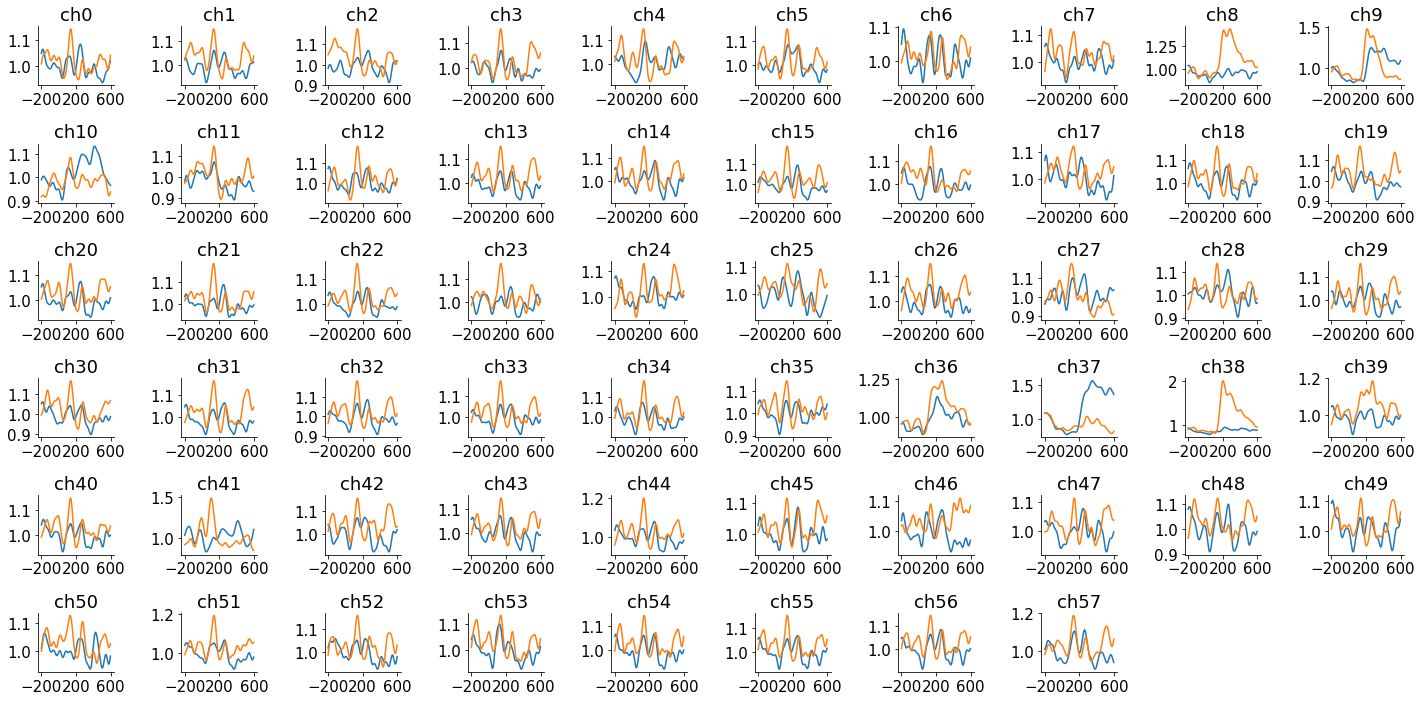

In [ ]:
# let's find the electrodes that distinguish faces from houses
from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
for j in range(elec_num):
  ax = plt.subplot(6,10,j+1)
  plt.plot(trange, V_house[:,j])
  plt.plot(trange, V_face[:,j])
  plt.title('ch%d'%j)
  plt.xticks([-200,  200,  600])
  #plt.ylim([0, 4])
#print(dat1['locs'])
  

300


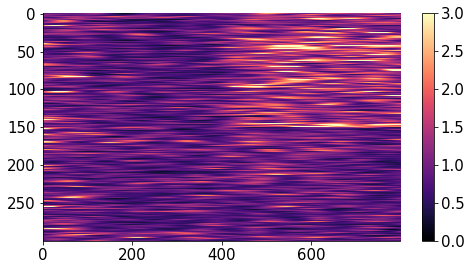

In [ ]:
# let's look at all the face trials for electrode 46 that has a good response to faces
# we will sort trials by stimulus id (1-50 is houses, 51-100 is faces)
plt.subplot(1,3,1)
isort = np.argsort(dat1['stim_id'])
print(len(dat1['stim_id']))
plt.imshow(V_epochs[isort,:,37].astype('float32'), aspect='auto', vmax=3, vmin = 0, cmap = 'magma')
plt.colorbar()

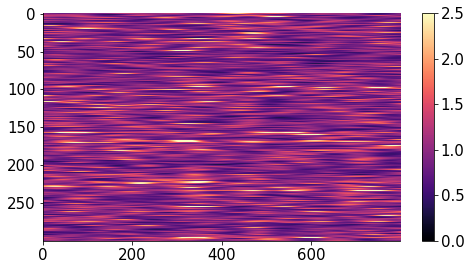

In [ ]:
# Electrode 43 seems to respond to houses
isort = np.argsort(dat1['stim_id'])
plt.subplot(1,3,1)
plt.imshow(V_epochs[isort,:,15].astype('float32'), aspect='auto', vmax=2.5, vmin = 0, cmap = 'magma')
plt.colorbar()